In [2]:
from gensim import models
import matplotlib.pyplot as plt

In [3]:
model=models.ldamodel.LdaModel.load('lda_91K_15c.model')

In [11]:
model.print_topics(-1)

[(0,
  '0.025*"kasus_positif" + 0.010*"thailand" + 0.009*"taman" + 0.007*"traveling" + 0.006*"per_hari" + 0.006*"keluar_rumah" + 0.006*"longsor" + 0.005*"hutan" + 0.005*"masa_psbb" + 0.005*"kasus"'),
 (1,
  '0.026*"wabah_corona" + 0.025*"imbas_corona" + 0.011*"corona" + 0.010*"tembus_rp" + 0.009*"wabah" + 0.008*"imbas" + 0.008*"orang_kaya" + 0.007*"virus_corona" + 0.007*"bicara_soal" + 0.007*"pariwisata"'),
 (2,
  '0.015*"anggota_dpr" + 0.013*"hand_sanitizer" + 0.010*"anggota_dprd" + 0.008*"anggota" + 0.008*"pemkot" + 0.008*"tingkat_mati" + 0.007*"meghan_markle" + 0.007*"karen_pooroe" + 0.007*"pangeran_harry" + 0.006*"jalan_rapid"'),
 (3,
  '0.016*"tengah_wabah" + 0.009*"walkot" + 0.008*"jakbar" + 0.007*"banjir" + 0.007*"tangerang" + 0.006*"korupsi" + 0.006*"kapolda" + 0.006*"seluruh" + 0.006*"banjir_jakarta" + 0.005*"duga_korupsi"'),
 (4,
  '0.073*"virus_corona" + 0.034*"new_normal" + 0.024*"virus" + 0.015*"corona" + 0.014*"minta_maaf" + 0.011*"normal" + 0.011*"new" + 0.010*"rendam_ba

In [5]:
import pandas as pd

In [12]:
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 5)])

In [38]:
# Sort the DataFrame by 'P' value in descending order

df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P'])
df_0=df[df.Topic==0]
df_1_sorted = df_0.sort_values(by='P', ascending=True)

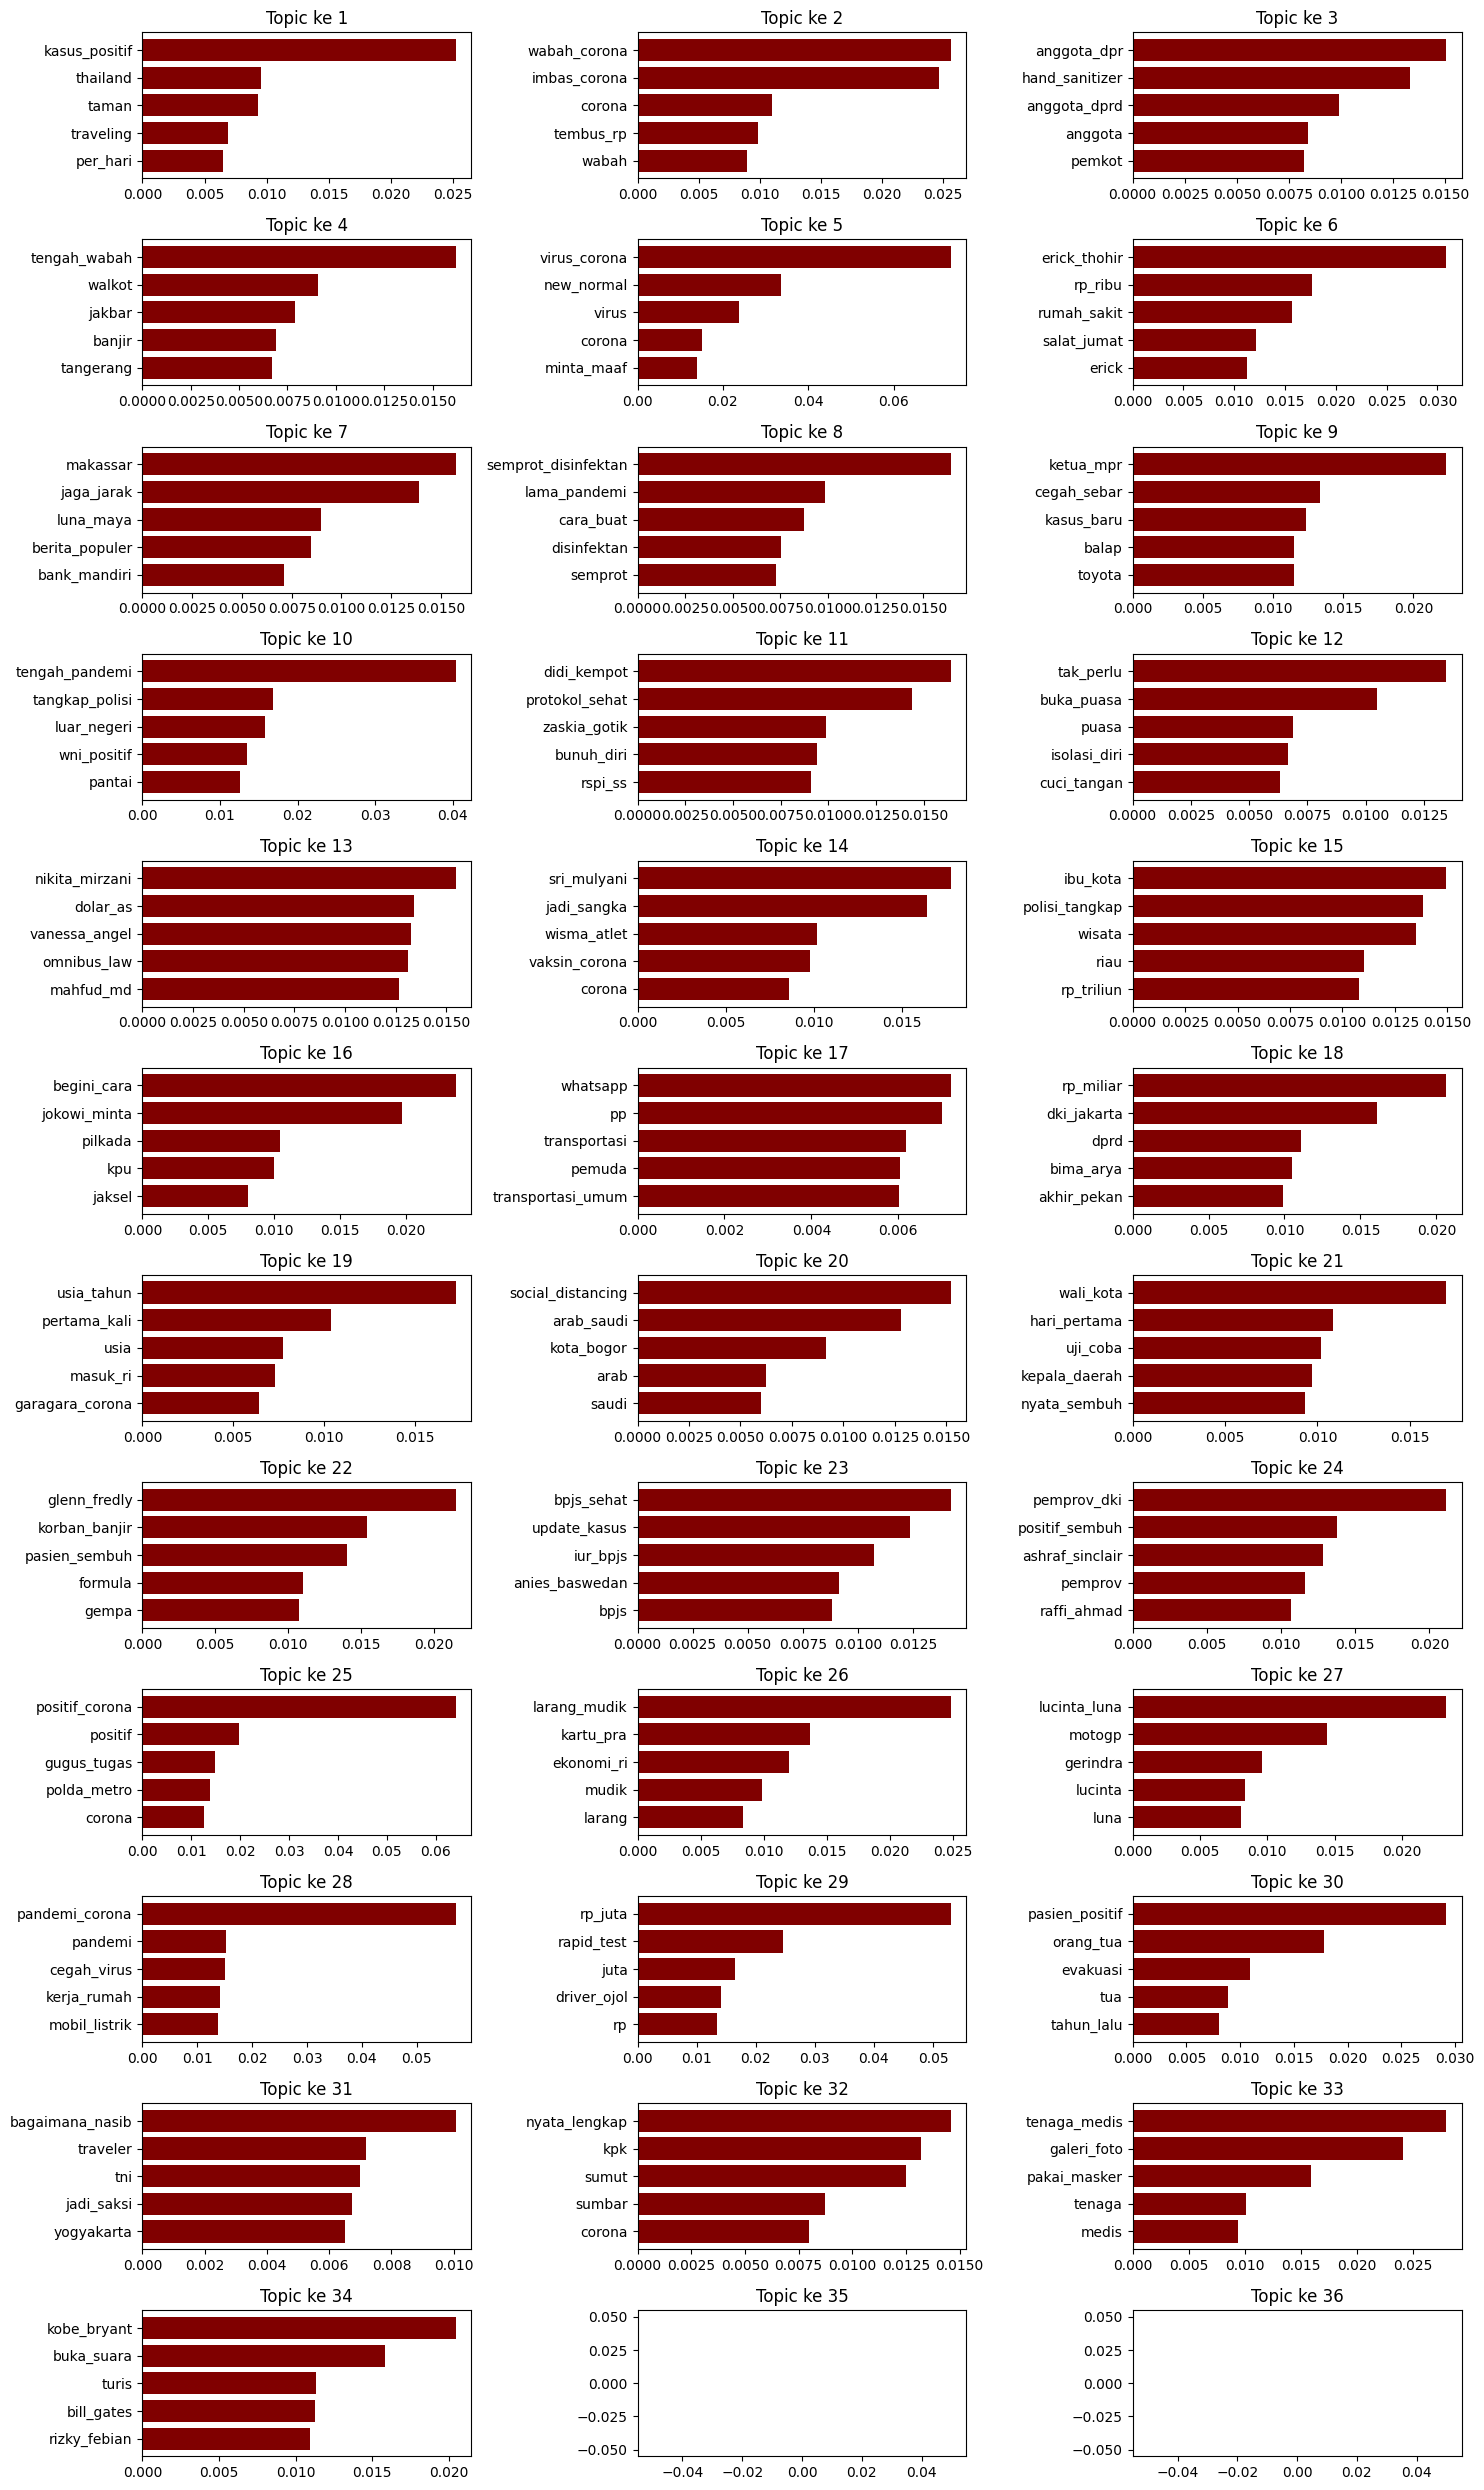

In [54]:
fig, axs = plt.subplots(12, 3, figsize=(15, 25))

# Example data for plotting
x = range(10)
y = [i * i for i in x]
counted_word=0
# Iterate over each subplot and plot some example data
for i in range(12):
    for j in range(3):
        df_0=df[df.Topic==counted_word]
        df_1_sorted = df_0.sort_values(by='P', ascending=True)
        axs[i, j].barh(df_1_sorted.Word.values, df_1_sorted.P.values, color ='maroon')
        axs[i, j].set_title(f'Topic ke {counted_word+1}')
        counted_word+=1

# Adjust layout
plt.tight_layout()
plt.savefig('topic-visualization.jpg')

# Show the plot
plt.show()